# Calculating constants with Sympy

In [1]:
import sympy
sympy.init_printing()

We need to find the values of constants A,B in the cubic flux traffic equation with given values of $$\rho_{\rm max} , u_{\rm max}\ , u^{\star}$$  .

The derivation of the cubic flux traffic flux equation in the lesson 3 gives us 3 equations:
\begin{equation} 0 = u_{\rm max}\, \rho_{\rm max}(1 - A \rho_{\rm max} - B \rho_{\rm max}^2)\end{equation}


\begin{equation} 0  = u_{\rm max}(1 - 2A\rho^{\star} - 3B(\rho^{\star})^2)\end{equation}

\begin{equation}
u^{\star} = u_{\rm max}(1 - A \rho^{\star} - B(\rho^{\star})^2)\end{equation}

First, let's define variables

In [2]:
(u_max , rho_max ,rho_star,u_max, A, B, u_star ) = \
        sympy.symbols('u_max rho_max rho_star u_max A B u_star')

Now the 3 equations

In [3]:
eq1 = sympy.Eq( 0, u_max*rho_max*(1 - A*rho_max-B*rho_max**2) )
eq2 = sympy.Eq( 0, u_max*(1 - 2*A*rho_star-3*B*rho_star**2) )
eq3 = sympy.Eq( u_star, u_max*(1 - A*rho_star - B*rho_star**2) )
eq3

Solving them for A and B, we obtain the following equations

In [4]:
#this come from the solution shown in the lesson
eqA= sympy.Eq (eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
eqA.simplify()

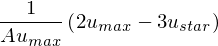

In [5]:
eqA.simplify()
rho_sol = sympy.solve(eqA, rho_star)[0]
rho_sol

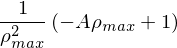

In [6]:
#solving A in term of A and rho max
eqB_solved= sympy.solve(eq1,B)[0]
eqB_solved

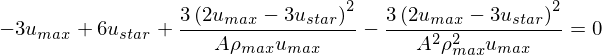

In [7]:
eqA_solved = sympy.solve(eq2.subs([(rho_star, rho_sol),(B, eqB_solved)]),A)
eq2.subs([(rho_star, rho_sol), (B, eqB_solved)]).simplify()

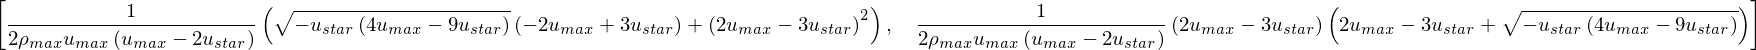

In [8]:
eqA_solved

The first solution used the positive root.
Now we can calculate the solution using the values given in the assignement.
\begin{align} 
\rho_{\rm max} &=15.0 \nonumber\\ u_{\rm max} &=2.0 \nonumber\\ u^{\star} &=1.5 \nonumber
\end{align}

In [9]:
Aval = eqA_solved[1].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15} )
Aval

In [10]:
Bval = eqB_solved.evalf(subs={rho_max: 15.0, A: Aval})
Bval

In [11]:
#finding maximum non-negative speed density :


# COMPUTING ASSIGNEMENT

The PDE we need to solve is
\begin{equation}
\frac{\partial }{\partial t} \vec{\mathbf{u}} + \frac{\partial }{\partial x} \vec{\mathbf{f}} = 0
\end{equation}
Where
\begin{equation}\vec{\mathbf{u}} = \left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]\end{equation}
and
\begin{equation}\vec{\mathbf{f}} = \left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\ \end{array} \right]
\end{equation}

Using the equation of state for an ideal gas, we can calculate the pressure in term of $e_T , \rho$

i.e. $$p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right).$$

Now, we can write
$$\vec{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$

$$\vec{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

In [12]:
sympy.init_printing(use_latex=False)

Let's compute it.

In [1]:

%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
    #Code parameters#
nx = 81
dx = 20/(nx-1)
dt = 0.0002
nt = 51
gamma = 1.4


    #Initial conditions#
rhoL = 1
uL = 0
pL = 100000
rhoR = 0.125
uR = 0
pR = 10000

In [3]:
def inicond(nx, rhoL,uL,pL,rhoR,uR,pR):
    """Computes the Shock Tube at t = 0: there's a left part,
         a right part and a discontinuity at x=0"""
    rho= numpy.zeros(nx)
    rho[0:]=rhoL
    rho[int((nx-1)/2):]=rhoR
    
    u= numpy.zeros(nx)
    u[0:]=uL
    u[int((nx-1)/2):]=uR
    
    p= numpy.zeros(nx)
    p[0:]=pL
    p[int((nx-1)/2):]=pR
    
    inivect = numpy.array([rho,u,p])
    return inivect

We will write down the u,f vectors in term of u1,2,3

In [4]:
#First, we need to calculate the eT value for all x using the state equation#
eT = numpy.zeros(nx)
[rho, u, p] = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)

eT[0:] = p[0:]/(gamma-1) /rho[0:] + 0.5*u[0]**2  


In [5]:
#We create the vectors U and F

U = numpy.array([rho, rho*u, rho*eT])

def computeF(U):
    f1 = U[1]
    f2 = U[1]**2/U[0] + (gamma-1) * (U[2] -0.5*U[1] **2/U[0])
    f3 = (U[2] +(gamma-1)*(U[2] - 0.5*U[1]**2/U[0]))*U[1]/U[0]
    return numpy.array([f1,f2,f3])
     
F=computeF(U)


In [6]:
#Now we compute the Richtmyer method#
def richtmyer(U):
    
    U_n = numpy.zeros((nt,len(U),nx))
    U_half = numpy.empty_like(U)
    U_n[:,:] = U.copy()
    U_half =U.copy()
    
    for t in range(1,nt):
        F= computeF(U)
        U_half[0:,1:] = 0.5*(U[0:,1:]+U[0:,:-1]) - dt/(2*dx) * (F[0:,1:]-F[0:,:-1])
        F_half= computeF(U_half)
        U_n[t,0:,:-1] = U[0:,:-1] - dt/dx * (F_half[0:,1:]-F_half[0:,:-1])
        U = U_n[t].copy()
    return U_n
#I copied the global pattern of this function from the MacCormack function from lesson 2
#We will be able to do some cool animations with it

In [7]:
U_n = richtmyer(U)

In [8]:
#Uc is a vector containing information on density, velocity and pressure in space and time#
Uc = numpy.empty_like(U_n)
Uc[0:,0,0:] = U_n[0:,0,0:]
Uc[0:,1,0:] = U_n[0:,1,0:]/U_n[0:,0,0:]
Uc[0:,2,0:] = (gamma-1) * (U_n[0:,2,0:]- U_n[0:,1,0:]**2 /U_n[0:,0,0:]/2)

## Showing results


In [9]:
from matplotlib import animation
from IPython.display import HTML
def animate(data):
    x = numpy.linspace(-10,10,nx)
    y = data
    line.set_data(x,y)
    return line,

### Density

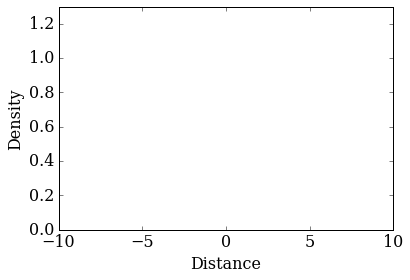

In [10]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(0,1.3),xlabel=('Distance'),ylabel=('Density'));
line, = ax.plot([],[],color='#003366', lw=2);

In [11]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,0,0:], interval=20)
HTML(anim.to_html5_video())

### Velocity

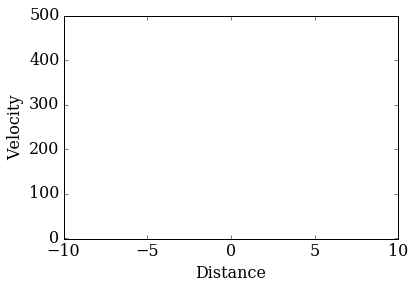

In [12]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-1,500),xlabel=('Distance'),ylabel=('Velocity'));
line, = ax.plot([],[],color='#003366', lw=2);

In [13]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,1,0:], interval=20)
HTML(anim.to_html5_video())

### Flux

In [26]:
FF= numpy.empty_like(U_n)
for i in range(0,50):
    FF[i]= computeF(U_n[i])

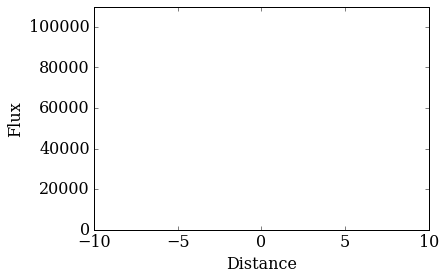

In [27]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-1,110000),xlabel=('Distance'),ylabel=('Flux'));
line, = ax.plot([],[],color='#003366', lw=2);


In [28]:
anim = animation.FuncAnimation(fig, animate, frames=FF[0:,1,0:], interval=20)
HTML(anim.to_html5_video())

### PRESSURE

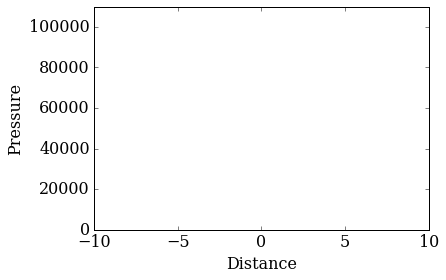

In [29]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(0,110000),xlabel=('Distance'),ylabel=('Pressure'));
line, = ax.plot([],[],color='#003366', lw=2);

In [30]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,2,0:], interval=20)
HTML(anim.to_html5_video())

We observe a behaviour similar to the analytic solution for density, velocity, pressure. However, there are 2 types of "Gibb's phenomenon" seen at shocks. If the function itself is discontinuous, we see an oscillating wave propagating near the discontinuity point. If the derivative of the function is discontinuous, there's an oriented bump at that point. We notice that the bumps are much more localised than the oscillating waves.


## Assignement asked values
Here we find the values asked in the assignement

In [31]:
Uc[50,1,50]

292.611471527

In [32]:
Uc[50,2,50]

30250.8901676

In [33]:
Uc[50,0,50]

0.374691402648

Let's try different initial conditions

In [34]:
#This function takes initial conditions and gives back the solution to Sod's problem#
def sod(rhoL,uL,pL,rhoR,uR,pR):
    eT = numpy.zeros(nx)
    rho = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)[0]
    u = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)[1] 
    p = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)[2]

    eT[0:] = p[0:]/(gamma-1) /rho[0:] + 0.5*u[0]**2
    
    u1 = rho
    u2 = rho * u
    u3 = rho * eT
    U = numpy.array([u1,u2,u3])
    U_n = richtmyer(U)
    
    Uc = numpy.empty_like(U_n)
    Uc[0:,0,0:] = U_n[0:,0,0:]
    Uc[0:,1,0:] = U_n[0:,1,0:]/U_n[0:,0,0:]
    Uc[0:,2,0:] = (gamma-1) * (U_n[0:,2,0:]- U_n[0:,0,0:]* U_n[0:,1,0:]**2/2)
    
    return Uc

In [35]:
    #Code parameters#
nx = 81
dx = 20/(nx-1)
dt = 0.0002
nt = 60
gamma = 1.4


    #Initial conditions#
rhoL = 1
uL = 1
pL = 100000
rhoR = 0.125
uR = 0
pR = 10000


Let's discute the convergence of the solution.
As we saw on animations, solutions for velocity, pressure and density partially had waves (density even 2 of them, one slower and one faster). Obviously, this imposes conditions on the ratio dt/dx given by the wave's speed and the CFL number.
However, given the equations, the wave's speed doesn't come up directly.
First, we're going to make approximative calculations to see what direction we should take.
The Velocity-Distance animation (and the graph given for the analytical solution in lesson 3.5) gives us an approximative value of 290 for the wave velocity moving rightway. Let's see if how the solution behaves when v= 300 and CFL = 1

C:\Users\clion\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: overflow encountered in multiply


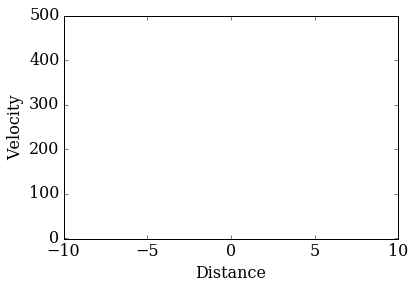

In [36]:
cfl=1
v= 340
dt=cfl*dx/v

Uc= sod(rhoL,uL,pL,rhoR,uR,pR)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-1,500),xlabel=('Distance'),ylabel=('Velocity'));
line, = ax.plot([],[],color='#003366', lw=2);

In [37]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,1,0:], interval=20)
HTML(anim.to_html5_video())

0

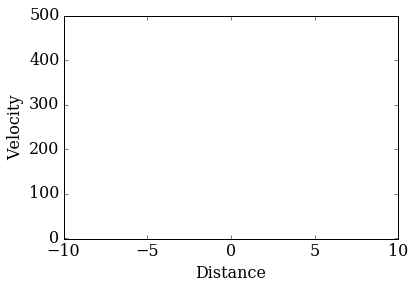

In [38]:
#The solution rapidly blows up. Maybe CFL=0.5? (I had to augment the v a little bit too, so it is bigger than the bumps from #
#the "Gibb's phenomenon")#
cfl=.5
v= 340
dt=cfl*dx/v

Uc= sod(rhoL,uL,pL,rhoR,uR,pR)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-1,500),xlabel=('Distance'),ylabel=('Velocity'));
line, = ax.plot([],[],color='#003366', lw=2);

In [39]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,1,0:], interval=20)
HTML(anim.to_html5_video())

We can compare this animation with the previous ones. It seems that improving the resolution brings a greater "Gibb's effect", but lowering the resolution too much may make the solution unstable. So finding the right resolution is an important question. For this problem, the "right" resolution seems to be the one with the smallest Gibb's bumps and that doesn't diverge.
As we have explicite values for the wave speed, we can find it's maximum value(i.e. we're searching for the biggest bump). (We need to not take account of the bump at x=0 so we'll take measures on x>2.5).

In [40]:
vmax= 0
for i in range (0,nt):
    for j in range (50,80):
        if vmax < Uc[i,1,j] :
            vmax = Uc[i,1,j]
vmax

337.301917076

Obviously this value depends on the wave's speed we've assumed at the beginning, so an itterative method would give some better results.

----------------------------------------

Making things look pretty

In [41]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())